# 과대 적합
* Overfitting
* 훈련 데이터에서는 잘 되지만, 새로운 데이터에서 모델의 성능이 낮아지는 경향
* 훈련 데이터에 과도하게 최적화되어 다른 데이터에서는 일반화 되지 못 함


## 과소 적합
* 훈련 초기 훈련 데이터의 손실이 낮아질수록 테스트 데이터의 손실도 낮아짐
* 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못함
* 모델의 성능이 계속 발전될 여지가 남아 있는 상태


## 최적화와 일반화 
* 최적화와 일반화 사이의 trade-off가 근본적 이슈
* 최적화 : 가능한 훈련 데이터에서 최고의 성능
* 일반화 : 훈련된 모델이 새로운 데이터에서 얼마나 잘 수행되는가

# 규제
* 과대적합을 피하는 처리 과정
* 주요 기법 : 네트워크 크기 축소, 가중치 규제 추가, 드롭아웃 추가

IMDB 데이터셋 로딩

In [16]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # one-hot encoding을 위한 벡터(2d 텐서)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # 특정 값만 1 할당
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 네트워크 크기 축소
* 모델의 크기(학습 파라미터 수)를 줄이는 가장 단순한 방법
* 모델의 용량이 너무 크면 훈련 데이터를 쉽게 학습하지만 일반화 능력이 없음
* 반대로 용량이 너무 작으면 매핑을 쉽게 학습하지 못함
* 따라서 절충점을 찾아야 함
* 데이터에 알맞은 모델 크기를 찾으려면 각기 다른 구조를 평가해 보아야 함 : 공식 없음

In [18]:
from keras import models
from keras import layers

origianl_model = models.Sequential()
origianl_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
origianl_model.add(layers.Dense(16, activation='relu'))
origianl_model.add(layers.Dense(1, activation='sigmoid'))

origianl_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [19]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [20]:
original_hist = origianl_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.4732 - acc: 0.8189 - val_loss: 0.3705 - val_acc: 0.8614
Epoch 2/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2745 - acc: 0.9089 - val_loss: 0.2946 - val_acc: 0.8867
Epoch 3/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2091 - acc: 0.9280 - val_loss: 0.2790 - val_acc: 0.8899
Epoch 4/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.1737 - acc: 0.9399 - val_loss: 0.2871 - val_acc: 0.8863
Epoch 5/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.1489 - acc: 0.9481 - val_loss: 0.3085 - val_acc: 0.8784
Epoch 6/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.1304 - acc: 0.9560 - val_loss: 0.3208 - val_acc: 0.8784
Epoch 7/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.1153 - acc: 0.9614 - val_loss: 0.3398 - val_ac

In [22]:
smaller_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.5922 - acc: 0.6936 - val_loss: 0.5345 - val_acc: 0.7705
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.4803 - acc: 0.8508 - val_loss: 0.4803 - val_acc: 0.8373
Epoch 3/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.4243 - acc: 0.8983 - val_loss: 0.4494 - val_acc: 0.8762
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.3825 - acc: 0.9236 - val_loss: 0.4288 - val_acc: 0.8839
Epoch 5/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.3387 - acc: 0.9394 - val_loss: 0.4129 - val_acc: 0.8793
Epoch 6/20
25000/25000 [==============================] - 2s 96us/step - loss: 0.2895 - acc: 0.9493 - val_loss: 0.3767 - val_acc: 0.8799
Epoch 7/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2267 - acc: 0.9559 - val_loss: 0.3297 - val_ac

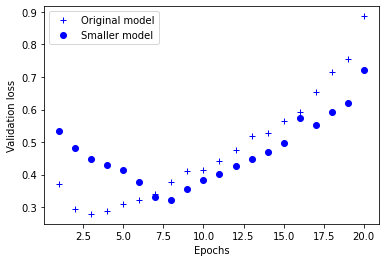

In [23]:
epochs = range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
bigger_hist = origianl_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 90us/step - loss: 5.3135e-05 - acc: 1.0000 - val_loss: 1.5948 - val_acc: 0.8439
Epoch 2/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.6353 - val_acc: 0.8427
Epoch 3/20
25000/25000 [==============================] - 2s 89us/step - loss: 4.8049e-05 - acc: 1.0000 - val_loss: 1.6520 - val_acc: 0.8438
Epoch 4/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.0025 - acc: 0.9996 - val_loss: 1.7003 - val_acc: 0.8430
Epoch 5/20
25000/25000 [==============================] - 2s 91us/step - loss: 2.4839e-05 - acc: 1.0000 - val_loss: 1.7154 - val_acc: 0.8422
Epoch 6/20
25000/25000 [==============================] - 2s 91us/step - loss: 2.0625e-05 - acc: 1.0000 - val_loss: 1.7486 - val_acc: 0.8432
Epoch 7/20
25000/25000 [==============================] - 2s 90us/step - loss: 0.0023 - acc: 0.9995 - val_loss: 

KeyboardInterrupt: ignored

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_val_loss = bigger_hist.history['loss']

import matplotlib.pyplot as plt

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 가중치 규제 추가
* L1 규제 : 가중치의 절대값에 비례하는 비용 추가
* L2 규제(가중치 감쇠) : 가중치의 제곱에 비례하는 비용 추가

* 네트워크의 손실 함수에 큰 가중치에 연관된 비용 추가

In [28]:
#L2(0.001) 모델

from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [29]:
l2_model_hist = l2_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.4909 - acc: 0.8159 - val_loss: 0.3911 - val_acc: 0.8683
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.3110 - acc: 0.9052 - val_loss: 0.3416 - val_acc: 0.8838
Epoch 3/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2658 - acc: 0.9212 - val_loss: 0.3691 - val_acc: 0.8672
Epoch 4/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.2451 - acc: 0.9284 - val_loss: 0.3340 - val_acc: 0.8849
Epoch 5/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2308 - acc: 0.9354 - val_loss: 0.3400 - val_acc: 0.8827
Epoch 6/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.2210 - acc: 0.9392 - val_loss: 0.3786 - val_acc: 0.8704
Epoch 7/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2143 - acc: 0.9420 - val_loss: 0.3639 - val_

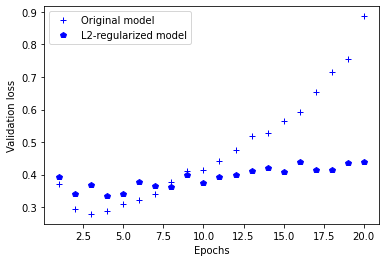

In [31]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bp', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

* 두 모델의 파라미터 수가 동일해도 L2 규제를 사용한 모델이 과대적합에 잘 견딤

## 드롭아웃 추가
* 신경망에서 사용되는 규제 기법 중 가장 효과적
* 훈련하는 동안 무작위로 층의 일부 축력 특성을 제외
* 뉴런의 일부를 무작위하게 제거하여 뉴런 간 불필요한 관계 특성 배제
* 드롭아웃 비율은 제외될 특성의 비율(보통 0.2~0.5 사이 지정)
* 테스트 시 드롭아웃되지 않아 훈련 때 보다 더 많은 유닛이 활성화되므로 층의 출력을 드롭아웃 비율에 비례하여 스케일 조정

In [34]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation = 'relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation = 'sigmoid'))

dpt_model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [35]:
dpt_model_hist = dpt_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.6072 - acc: 0.6629 - val_loss: 0.4531 - val_acc: 0.8610
Epoch 2/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.4478 - acc: 0.8136 - val_loss: 0.3372 - val_acc: 0.8782
Epoch 3/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.3567 - acc: 0.8663 - val_loss: 0.2987 - val_acc: 0.8800
Epoch 4/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.2940 - acc: 0.8960 - val_loss: 0.2926 - val_acc: 0.8772
Epoch 5/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2562 - acc: 0.9115 - val_loss: 0.2816 - val_acc: 0.8884
Epoch 6/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.2265 - acc: 0.9250 - val_loss: 0.2960 - val_acc: 0.8837
Epoch 7/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.1968 - acc: 0.9326 - val_loss: 0.3176 - val_ac

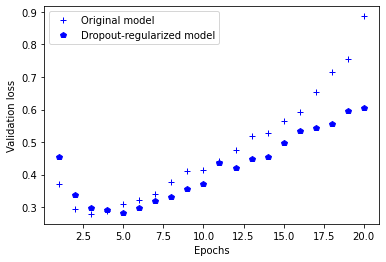

In [36]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bp', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 결론
* 훈련 데이터를 더 모음
* 네트워크의 용량을 감소시킴
* 가중치 규제를 추가함
* 드롭아웃을 추가함